In [8]:
import pandas as pd
from config import *

df = pd.read_excel(f"{path_unify}2023-11-01_df.xlsx")

data = df.loc[df["tipoPropiedad"]!="TERRENO"]

In [13]:
data.loc[data["cantDormitorios"].isna(), "cantDormitorios"] = -1
data.loc[data["cantBanos"].isna(), "cantBanos"] = -1
data.loc[data["cantCochera"].isna(), "cantCochera"] = -1

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Supongamos que tu DataFrame se llama 'data'
# Cargar el conjunto de datos si no lo has hecho aún
# data = pd.read_csv("nombre_del_archivo.csv")

# Seleccionar las columnas relevantes para el clustering
features = ['precioUSD', 'terrenoEdificado', 'barrio']
data_for_clustering = data[features]

# Escalar los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Determinar el número óptimo de clusters utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Visualizar el método del codo para encontrar el número óptimo de clusters
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# Elegir el número óptimo de clusters (en este caso, por ejemplo, 3 clusters)
n_clusters = 3

# Aplicar el algoritmo de K-Means
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Agregar la información de los clusters al DataFrame original
data['cluster'] = clusters

# Visualizar los clusters en un gráfico de dispersión 3D (usando PCA para reducción de dimensionalidad)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

data['pca-one'] = pca_result[:, 0]
data['pca-two'] = pca_result[:, 1]
data['pca-three'] = pca_result[:, 2]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='pca-one', y='pca-two',
    hue='cluster',
    palette=sns.color_palette('viridis', n_clusters),
    data=data,
    legend='full',
    alpha=0.7
)
plt.title('Agrupamiento de Publicaciones según Similitud en Precio y Frecuencia')
plt.show()


ValueError: could not convert string to float: 'JOSE HERNANDEZ'

c:\Users\benja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\benja\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\benja\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\benja\AppData\Local\Programs\Python\Python310\lib\subpro

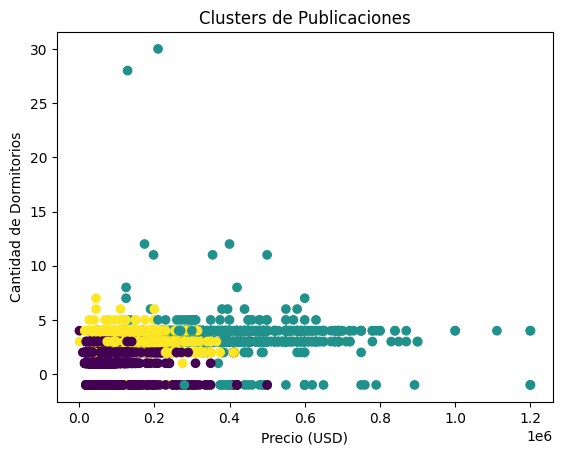

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes para el análisis
features = ['precioUSD', 'terrenoEdificado', 'cantDormitorios', 'cantBanos', 'cantCochera']
X = data[features]

# Normalizar los datos para que todas las características tengan la misma escala
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar el algoritmo de k-means
k = 3  # Número de clusters, puedes ajustar este valor según tus necesidades
kmeans = KMeans(n_clusters=k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar los resultados
plt.scatter(data['precioUSD'], data['cantDormitorios'], c=data['cluster'], cmap='viridis')
plt.title('Clusters de Publicaciones')
plt.xlabel('Precio (USD)')
plt.ylabel('Cantidad de Dormitorios')
plt.show()

# Ahora, puedes analizar la distribución de clusters en cada barrio
average_clusters_per_barrio = data.groupby('barrio')['cluster'].mean().reset_index()

# Visualizar en un mapa la categoría promedio de cada barrio
# (Puedes usar bibliotecas como geopandas o folium para visualizar mapas)

# Guardar los resultados
data.to_csv('./data_con_clusters.csv', index=False)
average_clusters_per_barrio.to_csv('average_clusters_per_barrio.csv', index=False)
